In [1]:
%load_ext autoreload
%autoreload 2
import warnings
import numpy as np
import time
import os
from dotenv import load_dotenv
os.environ["USE_PYGEOS"] = "0"
import napari_sparrow as nas
from spatialdata import read_zarr
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
%run own_and_modified_functions.ipynb
warnings.simplefilter(action='ignore')

the value of the environment variable BASIC_DCT_BACKEND is not in ["JAX","SCIPY"]


In [2]:
OUTPUT_DIR = '/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data'
sdata = read_zarr( os.path.join(  OUTPUT_DIR, 'sdata.zarr'  ) )
anndata = sc.read('/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/anndataNucA11') # reset original anndata
# delete anndata
del sdata.table
# create anndata
sdata.table = anndata
sdata

SpatialData object with:
├── Images
│     ├── 'clahe': SpatialImage[cyx] (1, 12864, 10720)
│     ├── 'raw_image': SpatialImage[cyx] (1, 12864, 10720)
│     ├── 'tiling_correction': SpatialImage[cyx] (1, 12864, 10720)
│     ├── 'tophat_filtered': SpatialImage[cyx] (1, 12864, 10720)
│     └── 'transcript_density': SpatialImage[cyx] (1, 12864, 10720)
├── Labels
│     └── 'segmentation_mask': SpatialImage[yx] (12864, 10720)
├── Points
│     └── 'transcripts': DataFrame with shape: (4754932, 3) (2D points)
├── Shapes
│     ├── 'expanded_cells20': GeoDataFrame shape: (11228, 1) (2D shapes)
│     ├── 'filtered_expanded_cells20_low_counts': GeoDataFrame shape: (367, 1) (2D shapes)
│     ├── 'filtered_expanded_cells20_segmentation': GeoDataFrame shape: (50, 1) (2D shapes)
│     ├── 'filtered_expanded_cells20_size': GeoDataFrame shape: (280, 1) (2D shapes)
│     ├── 'filtered_segmentation_mask_boundaries_low_counts': GeoDataFrame shape: (367, 1) (2D shapes)
│     ├── 'filtered_segmentation_mask_

In [3]:
# count the number of principal components that explain at least 1% of the variance
n_pca = np.count_nonzero(sdata.table.uns['pca']['variance_ratio'] > 0.01)
n_pca
# play with the number of neighbors 
# Larger values result in more global views of the manifold, while smaller values result in more local data being preserved. 
# In general values should be in the range 2 to 100, default = 15
n_neighb = 15
# play with the cluster resolution
# A parameter value controlling the coarseness of the clustering. Higher values lead to more clusters. default = 1 
n_clust_res = 1
path_mg = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv"

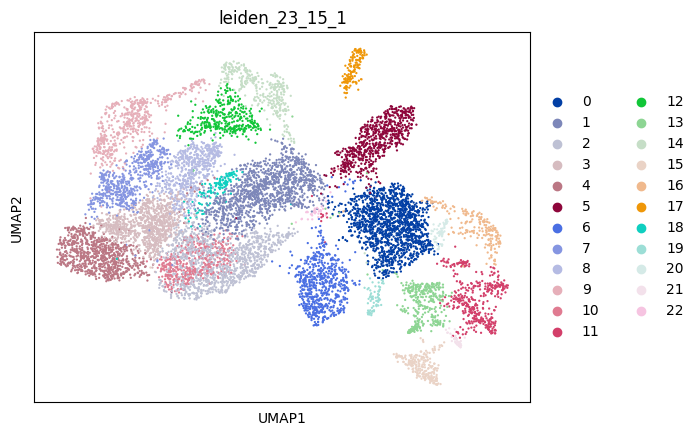

    leiden_23_15_1
0         0.126024
1         0.107143
2         0.097257
3         0.081315
4         0.073566
5         0.059227
6         0.056733
7         0.052547
8         0.051300
9         0.044888
10        0.037496
11        0.036961
12        0.032419
13        0.031439
14        0.028678
15        0.021642
16        0.018080
17        0.013270
18        0.011845
19        0.005967
20        0.005166
21        0.003741
22        0.003295
{'B cell': ['17'], 'Chol': ['15'], 'Endo vein': ['16'], 'Fibr': ['11', '21'], 'Hepa': ['1', '2', '3', '4', '7', '8', '9', '10', '12', '14', '18'], 'Kupf': ['5', '13'], 'LSEC': ['0', '19', '20'], 'Stel': ['6', '22']}


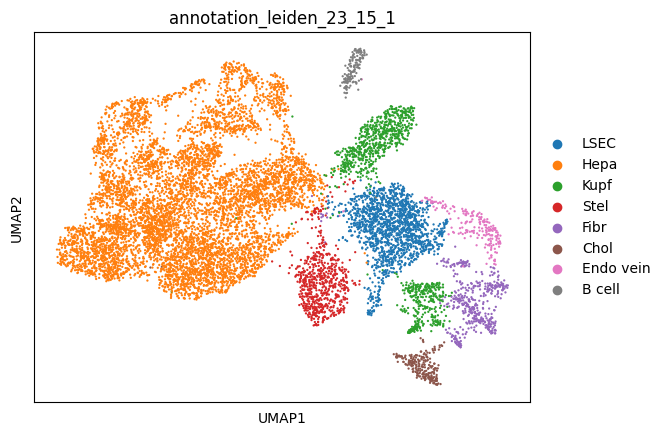

              atlas  annotation_leiden_23_15_1
B cell     0.006215                   0.013270
Chol       0.026733                   0.021642
Hepa       0.579985                   0.618454
Kupf       0.032037                   0.090666
LSEC       0.092414                   0.137157
Meso       0.027965                        NaN
Endo vein  0.031662                   0.018080
Fibr       0.030430                   0.040702
Stel       0.137683                   0.060029


,Hepa,LSEC,Endo vein,Chol,Kupf,Stel,Fibr,B cell,Meso
0,0.298690,0.427510,0.103279,0.041213,0.066885,0.111843,0.047357,0.003002,1.081092e-02
1,0.546834,0.002932,0.002155,0.100921,0.008674,0.045696,0.031766,0.000550,2.709512e-02
2,0.892117,0.003176,0.008136,0.176699,0.021672,0.088568,0.061912,0.001187,3.757540e-02
3,1.000000,0.002389,0.008716,0.203550,0.036523,0.178792,0.127577,0.000216,1.327807e-02
4,0.890595,0.002011,0.006584,0.173624,0.028515,0.095030,0.056764,0.000557,5.900124e-03
5,0.222120,0.098832,0.014295,0.018179,1.000000,0.107160,0.061149,0.007603,1.440479e-02
6,0.247485,0.031254,0.045740,0.017715,0.098171,1.000000,0.573760,0.001423,5.182703e-02
7,0.848275,0.002387,0.006806,0.186662,0.023811,0.217954,0.079659,0.000327,3.817444e-02
8,0.642397,0.000378,0.002993,0.141170,0.007379,0.139241,0.098599,0.000136,4.635810e-02
9,0.773819,0.004293,0.004120,0.147497,0.017846,0.098389,0.066475,0.000104,4.256161e-02


In [4]:
# With norm_expr_var = True and norm_cell_type_score = True
scores_leiden_celltype1 = make_umap_and_perform_leiden_annotation(sdata,path_mg,n_PCAs=n_pca,n_neighbors=n_neighb,cluster_resolution=n_clust_res)
suffix = '_' + str(n_pca) + '_' + str(n_neighb) + '_' + str(n_clust_res) 
suffix_short = '_' + str(n_pca) + '_' + str(n_neighb) 
path_mg = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv"
visualize_classification(sdata,'leiden'+suffix,'umap'+suffix_short,path_mg,cell_type_annotation=False,plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)
print(sdata.table.uns['mapping_cell_type_leiden'+suffix])
visualize_classification(sdata,'annotation_leiden'+suffix,'umap'+suffix_short,path_mg,cell_type_annotation=True,plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)
scores_leiden_celltype1

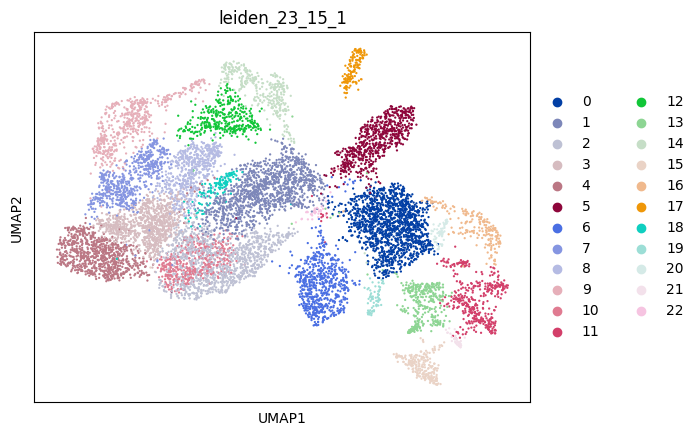

    leiden_23_15_1
0         0.126024
1         0.107143
2         0.097257
3         0.081315
4         0.073566
5         0.059227
6         0.056733
7         0.052547
8         0.051300
9         0.044888
10        0.037496
11        0.036961
12        0.032419
13        0.031439
14        0.028678
15        0.021642
16        0.018080
17        0.013270
18        0.011845
19        0.005967
20        0.005166
21        0.003741
22        0.003295
{'B cell': ['17'], 'Chol': ['15'], 'Endo vein': ['16'], 'Fibr': ['11', '21'], 'Hepa': ['1', '2', '3', '4', '7', '8', '9', '10', '12', '14', '18'], 'Kupf': ['5', '13'], 'LSEC': ['0', '19', '20'], 'Stel': ['6', '22']}


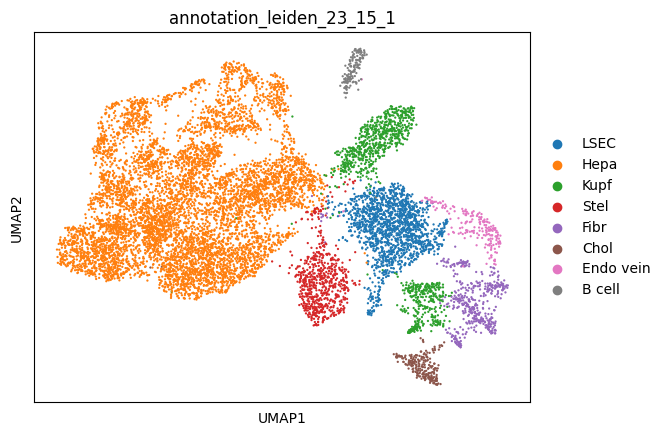

              atlas  annotation_leiden_23_15_1
B cell     0.006215                   0.013270
Chol       0.026733                   0.021642
Hepa       0.579985                   0.618454
Kupf       0.032037                   0.090666
LSEC       0.092414                   0.137157
Meso       0.027965                        NaN
Endo vein  0.031662                   0.018080
Fibr       0.030430                   0.040702
Stel       0.137683                   0.060029


,Hepa,LSEC,Endo vein,Chol,Kupf,Stel,Fibr,B cell,Meso
0,0.297417,0.516710,0.122435,0.042484,0.068067,0.113930,0.053197,0.003131,9.001011e-03
1,0.546881,0.003428,0.002622,0.107991,0.009080,0.048091,0.034665,0.000591,2.354980e-02
2,0.892244,0.003826,0.009651,0.189512,0.022360,0.091805,0.069526,0.001188,3.001615e-02
3,1.000000,0.002667,0.010179,0.218167,0.037391,0.179754,0.143095,0.000227,1.015124e-02
4,0.891424,0.002188,0.007626,0.186268,0.029441,0.098261,0.064674,0.000595,5.733925e-03
5,0.221058,0.120495,0.016615,0.019441,1.000000,0.108942,0.068951,0.007882,1.386657e-02
6,0.246700,0.036035,0.047604,0.018898,0.098310,1.000000,0.655768,0.001531,4.729700e-02
7,0.847729,0.002628,0.007891,0.198618,0.024233,0.213923,0.088152,0.000351,3.074252e-02
8,0.641692,0.000219,0.003476,0.148605,0.007949,0.140027,0.108302,0.000144,4.018550e-02
9,0.773093,0.005092,0.004867,0.157707,0.018058,0.100113,0.072911,0.000107,3.734003e-02


In [5]:
# With norm_expr_var = False and norm_cell_type_score = True
scores_leiden_celltype2 = make_umap_and_perform_leiden_annotation(sdata,path_mg,n_PCAs=n_pca,n_neighbors=n_neighb,cluster_resolution=n_clust_res,norm_expr_var=False)
suffix = '_' + str(n_pca) + '_' + str(n_neighb) + '_' + str(n_clust_res) 
suffix_short = '_' + str(n_pca) + '_' + str(n_neighb) 
path_mg = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv"
visualize_classification(sdata,'leiden'+suffix,'umap'+suffix_short,path_mg,cell_type_annotation=False,plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)
print(sdata.table.uns['mapping_cell_type_leiden'+suffix])
visualize_classification(sdata,'annotation_leiden'+suffix,'umap'+suffix_short,path_mg,cell_type_annotation=True,plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)
scores_leiden_celltype2

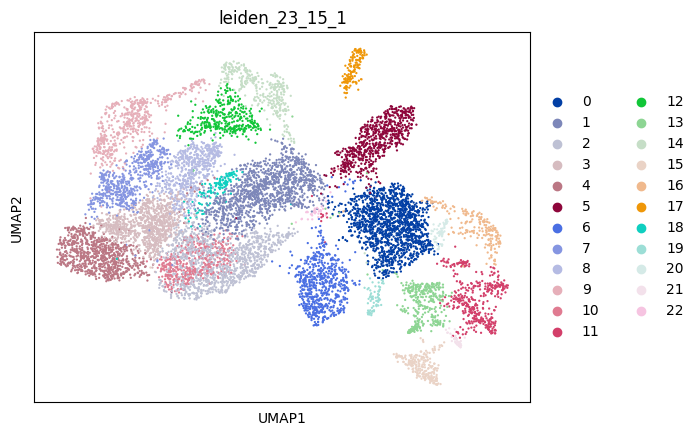

    leiden_23_15_1
0         0.126024
1         0.107143
2         0.097257
3         0.081315
4         0.073566
5         0.059227
6         0.056733
7         0.052547
8         0.051300
9         0.044888
10        0.037496
11        0.036961
12        0.032419
13        0.031439
14        0.028678
15        0.021642
16        0.018080
17        0.013270
18        0.011845
19        0.005967
20        0.005166
21        0.003741
22        0.003295
{'B cell': ['17'], 'Chol': ['15'], 'Endo vein': ['16', '19'], 'Fibr': ['11', '21'], 'Hepa': ['2', '3', '4', '7', '8', '9', '10', '12', '14', '18'], 'Kupf': ['5', '13'], 'LSEC': ['0', '20'], 'Stel': ['6'], 'unknown': ['1', '22']}


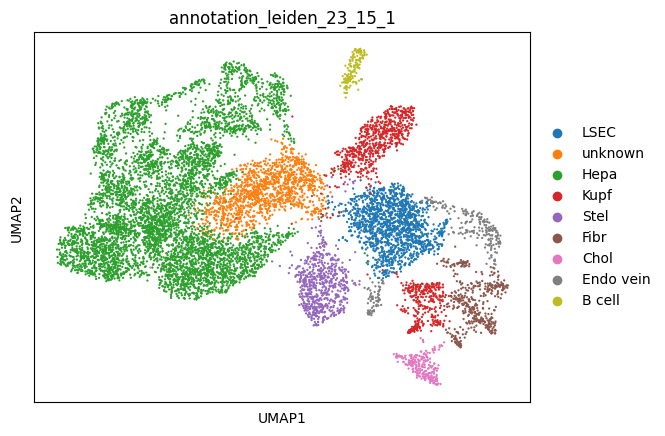

              atlas  annotation_leiden_23_15_1
B cell     0.006215                   0.013270
Chol       0.026733                   0.021642
Hepa       0.579985                   0.511311
Kupf       0.032037                   0.090666
LSEC       0.092414                   0.131190
Meso       0.027965                        NaN
Endo vein  0.031662                   0.024047
Fibr       0.030430                   0.040702
Stel       0.137683                   0.056733


In [6]:
# With norm_expr_var = True and norm_cell_type_score = False
scores_leiden_celltype = make_umap_and_perform_leiden_annotation(sdata,path_mg,n_PCAs=n_pca,n_neighbors=n_neighb,cluster_resolution=n_clust_res,norm_cell_type_score=False)
suffix = '_' + str(n_pca) + '_' + str(n_neighb) + '_' + str(n_clust_res) 
suffix_short = '_' + str(n_pca) + '_' + str(n_neighb) 
path_mg = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv"
visualize_classification(sdata,'leiden'+suffix,'umap'+suffix_short,path_mg,cell_type_annotation=False,plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)
print(sdata.table.uns['mapping_cell_type_leiden'+suffix])
visualize_classification(sdata,'annotation_leiden'+suffix,'umap'+suffix_short,path_mg,cell_type_annotation=True,plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)

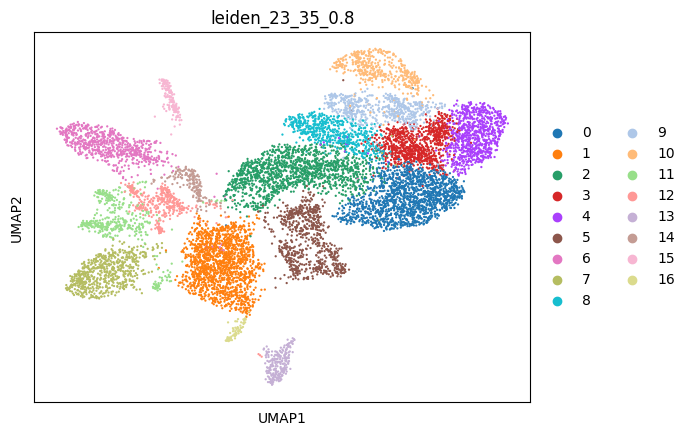

    leiden_23_35_0.8
0           0.135910
1           0.133684
2           0.122105
3           0.082561
4           0.074724
5           0.063858
6           0.060029
7           0.055843
8           0.052636
9           0.050410
10          0.040702
11          0.037317
12          0.035002
13          0.021375
14          0.014784
15          0.013092
16          0.005967
{'B cell': ['15'], 'Chol': ['13'], 'Endo vein': ['14'], 'Fibr': ['11'], 'Hepa': ['0', '2', '3', '4', '5', '8', '9', '10'], 'Kupf': ['6', '12'], 'LSEC': ['1', '16'], 'Stel': ['7']}


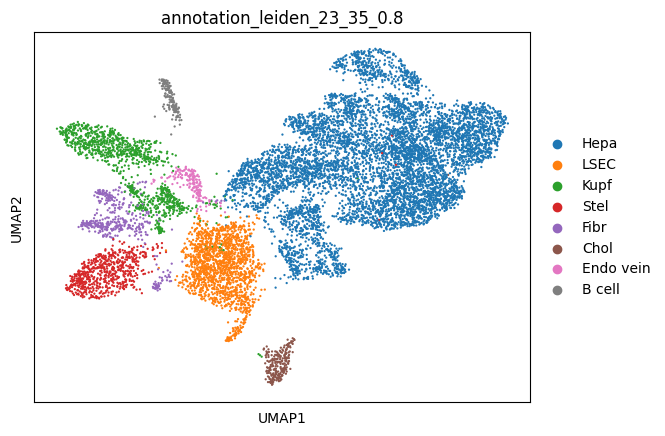

              atlas  annotation_leiden_23_35_0.8
B cell     0.006215                     0.013092
Chol       0.026733                     0.021375
Hepa       0.579985                     0.622907
Kupf       0.032037                     0.095030
LSEC       0.092414                     0.139651
Meso       0.027965                          NaN
Endo vein  0.031662                     0.014784
Fibr       0.030430                     0.037317
Stel       0.137683                     0.055843


In [7]:
# other good parameters for n_neighbors and cluster_resolution
n_neighb = 35    
n_clust_res = 0.8
make_umap_and_perform_leiden_annotation(sdata,path_mg,n_PCAs=n_pca,n_neighbors=n_neighb,cluster_resolution=n_clust_res)
suffix = '_' + str(n_pca) + '_' + str(n_neighb) + '_' + str(n_clust_res) 
suffix_short = '_' + str(n_pca) + '_' + str(n_neighb) 
path_mg = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv"
visualize_classification(sdata,'leiden'+suffix,'umap'+suffix_short,path_mg,cell_type_annotation=False,plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)
print(sdata.table.uns['mapping_cell_type_leiden'+suffix])
visualize_classification(sdata,'annotation_leiden'+suffix,'umap'+suffix_short,path_mg,cell_type_annotation=True,plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)